In [1]:
import os
import datetime
from gensim.models import Word2Vec as w2v


models = {}
for filename in os.listdir('models'):
        file_path = os.path.join('models', filename)
        models[filename[6:]] = w2v.load(file_path)


In [2]:
models

{'2023-December': <gensim.models.word2vec.Word2Vec at 0x1e632929dc0>,
 '2023-November': <gensim.models.word2vec.Word2Vec at 0x1e632929f40>,
 '2023-October': <gensim.models.word2vec.Word2Vec at 0x1e632929070>,
 '2023-September': <gensim.models.word2vec.Word2Vec at 0x1e64c582700>,
 '2024-April': <gensim.models.word2vec.Word2Vec at 0x1e64c582910>,
 '2024-February': <gensim.models.word2vec.Word2Vec at 0x1e64c582ac0>,
 '2024-January': <gensim.models.word2vec.Word2Vec at 0x1e64c582bb0>,
 '2024-March': <gensim.models.word2vec.Word2Vec at 0x1e64c582c10>,
 'total': <gensim.models.word2vec.Word2Vec at 0x1e64c582d30>}

In [3]:
model_total = models.pop('total')
models.pop('2023-September')

In [4]:
import datetime

models = dict(sorted(models.items(), key=lambda item: datetime.datetime.strptime(item[0], '%Y-%B')))


In [5]:
models

{'2023-October': <gensim.models.word2vec.Word2Vec at 0x1e632929070>,
 '2023-November': <gensim.models.word2vec.Word2Vec at 0x1e632929f40>,
 '2023-December': <gensim.models.word2vec.Word2Vec at 0x1e632929dc0>,
 '2024-January': <gensim.models.word2vec.Word2Vec at 0x1e64c582bb0>,
 '2024-February': <gensim.models.word2vec.Word2Vec at 0x1e64c582ac0>,
 '2024-March': <gensim.models.word2vec.Word2Vec at 0x1e64c582c10>,
 '2024-April': <gensim.models.word2vec.Word2Vec at 0x1e64c582910>}

In [6]:
word_pairs = [
    ('hamas', 'terrorist'),
    ('israel', 'selfdefence'),
    ('palestine', 'selfdefence'),
    ('israel', 'genocide'),
    ('israel', 'ceasefire'), 
]

result = {pair: [] for pair in word_pairs}

for pair in word_pairs:
    result[pair] = model_total.wv.similarity(*pair)
    print(f'Similarity: {pair[0]} vs {pair[1]} is {model_total.wv.similarity(*pair)}')

Similarity: hamas vs terrorist is 0.5636658072471619
Similarity: israel vs selfdefence is 0.2512640655040741
Similarity: palestine vs selfdefence is 0.05797537416219711
Similarity: israel vs genocide is 0.14960508048534393
Similarity: israel vs ceasefire is 0.2447299063205719


In [7]:
result

{('hamas', 'terrorist'): 0.5636658,
 ('israel', 'selfdefence'): 0.25126407,
 ('palestine', 'selfdefence'): 0.057975374,
 ('israel', 'genocide'): 0.14960508,
 ('israel', 'ceasefire'): 0.2447299}

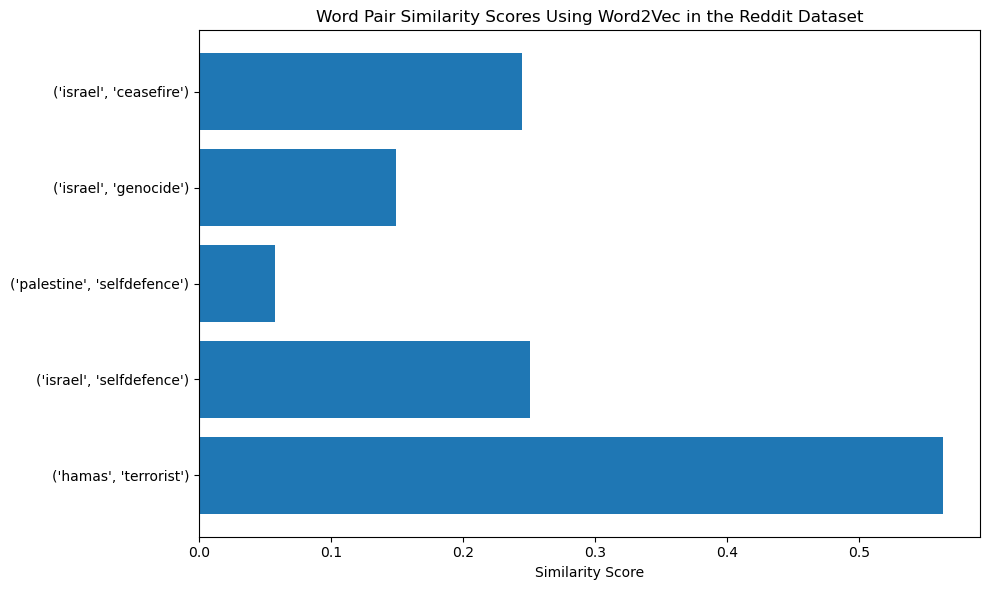

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(range(len(result)), list(result.values()), align='center')
plt.yticks(range(len(result)), list(result.keys()))  # This now applies to y-axis
plt.xlabel('Similarity Score')  # Changed to xlabel as this is now the value axis
plt.title('Word Pair Similarity Scores Using Word2Vec in the Reddit Dataset')
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.show()


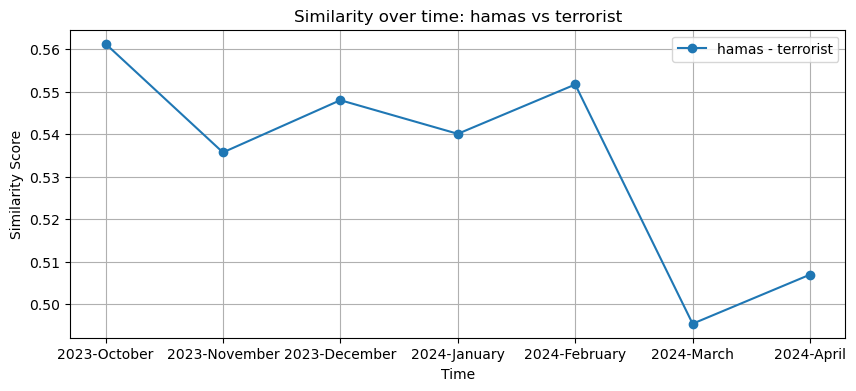

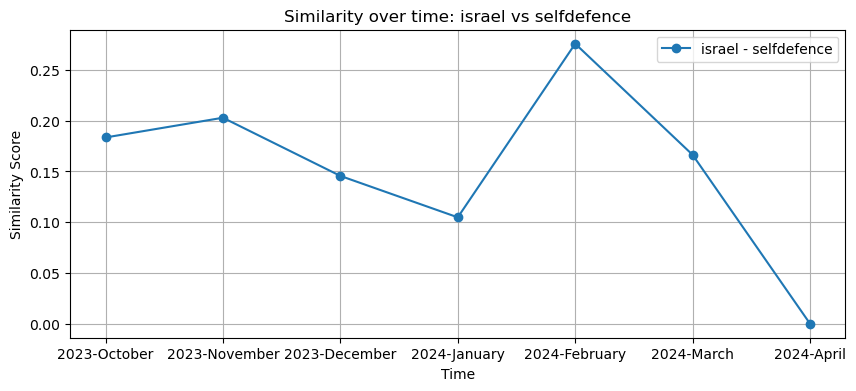

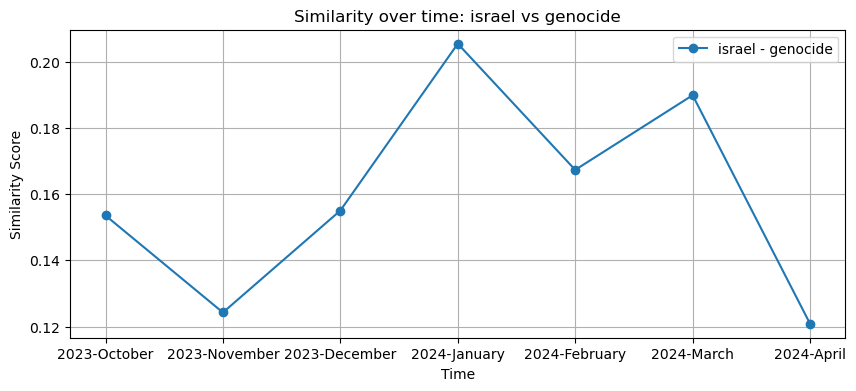

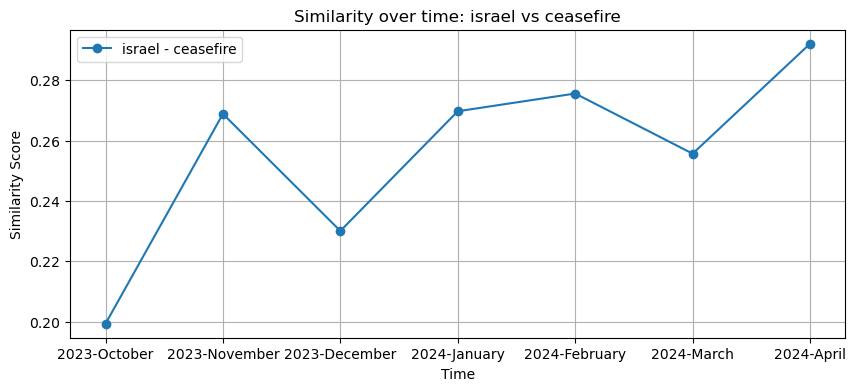

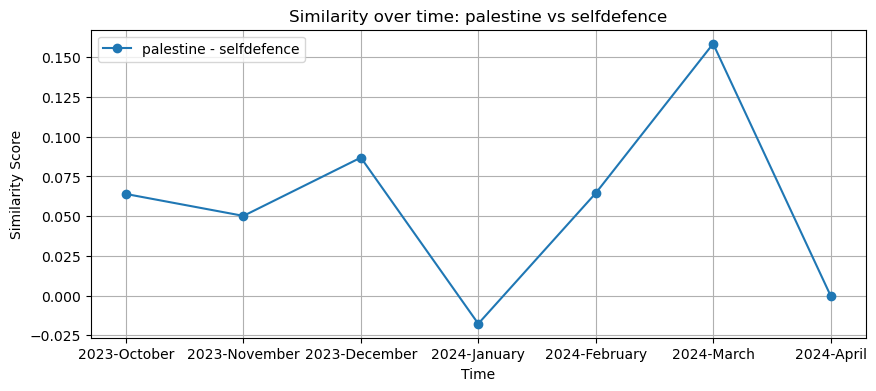

In [9]:
from datetime import datetime

# Given dictionary of Word2Vec models
# Define word pairs


word_pairs = [
    ('hamas', 'terrorist'),
    ('israel', 'selfdefence'),
    ('israel', 'genocide'),
    ('israel', 'ceasefire'), 
    ('palestine', 'selfdefence')
]

# Initialize a dictionary to hold results
results = {pair: [] for pair in word_pairs}

# Compute similarities
for date, model in models.items():
    for pair in word_pairs:
        # Check if both words are in the model's vocabulary
        try:
            similarity = model.wv.similarity(*pair)
        except:
            similarity = 0  # Output 0 if either word is missing
        results[pair].append(similarity)

# Plotting - creating a separate plot for each pair
for pair, similarities in results.items():
    plt.figure(figsize=(10, 4))
    plt.plot(list(models.keys()), similarities, marker='o', label=f'{pair[0]} - {pair[1]}')
    plt.title(f'Similarity over time: {pair[0]} vs {pair[1]}')
    plt.xlabel('Time')
    plt.ylabel('Similarity Score')
    plt.legend()
    plt.grid(True)
    plt.show()

